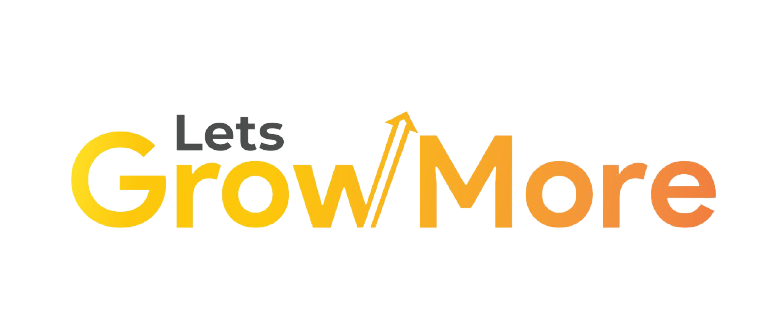

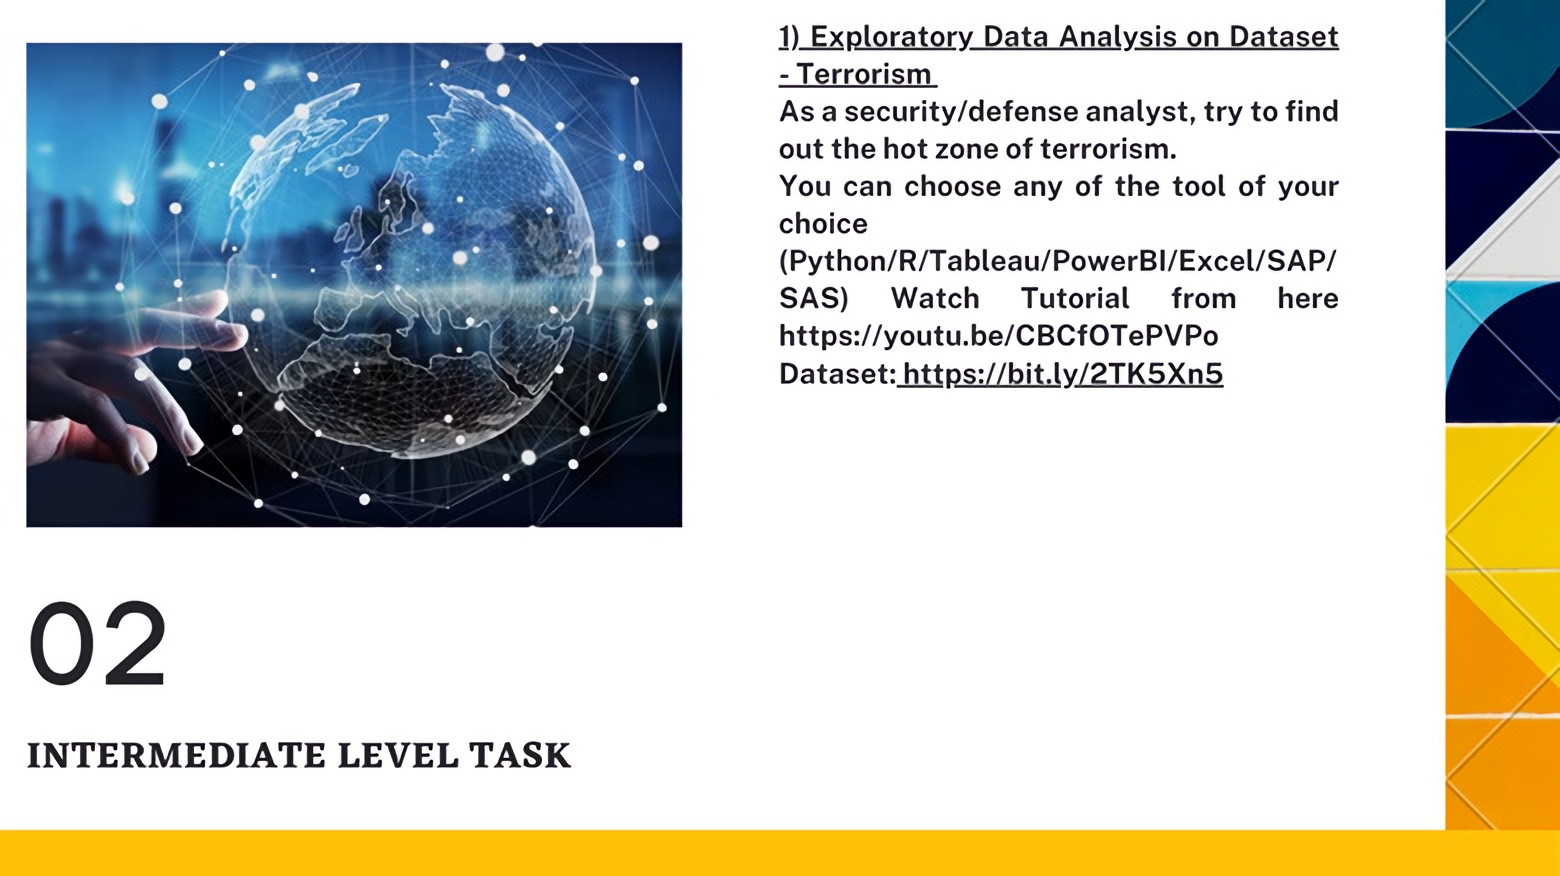

<p style = "font-size:16px"><b>BY: Lakshmi Sindhu P</b></p>

<p style="font-size:21px;"> <b> Problem Statement: </b> </p>
As a security/defence analyst, try to find out the hot zone of terrorism. What all security issues and insights you can derive by EDA?

-----------------------------
<p style="font-size:21px;"> <b> WHAT IS TERRORISM? </b> </p>
Terrorism is, in its broadest sense, the unlawful use of intentional violence to achieve political aims, especially against civilians. It is used in this regard primarily to refer to violence during peacetime or in the context of war against non-combatants (mostly civilians and neutral military personnel).

----------------------
<p style="font-size:21px;"> <b> About Dataset: </b> </p>

1. The Global Terrorism Database

> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

2. Characteristics of the Database

> Contains information on over 180,000 terrorist attacks
Currently the most comprehensive unclassified database on terrorist attacks in the world
Includes information on more than 88,000 bombings, 19,000 assassinations, and 11,000 kidnappings since 1970
Includes information on at least 45 variables for each case, with more recent incidents including information on more than 120 variables
More than 4,000,000 news articles and 25,000 news sources were reviewed to collect incident data from 1998 to 2017 alone

---------------------

<p style="font-size:18px;"> <b> STEPS TO FOLLOW: </b> </p>

* File Cleaning
* Exploratory Data Analysis
* Displaying all the plots

# File Cleaning:

## Importing necessary modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data into the dataset
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding ='ISO-8859-1', low_memory=False)

In [3]:
#glimpse of dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


## Collect useful columns for our analysis. We keep 20 out of 135 columns from the original data

In [8]:
#Renaming columns in order to get better format
df.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

#Keeping 20 columns
data = df[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Country      181691 non-null  object 
 3   Region       181691 non-null  object 
 4   Provstate    181270 non-null  object 
 5   City         181257 non-null  object 
 6   Crit1        181691 non-null  int64  
 7   Crit2        181691 non-null  int64  
 8   Crit3        181691 non-null  int64  
 9   Success      181691 non-null  int64  
 10  Suicide      181691 non-null  int64  
 11  Attacktype   181691 non-null  object 
 12  Targtype     181691 non-null  object 
 13  Natlty1      180132 non-null  object 
 14  Gname        181691 non-null  object 
 15  Guncertain1  181311 non-null  float64
 16  Claimed      115571 non-null  float64
 17  Weaptype     181691 non-null  object 
 18  Nkill        171378 non-

In [10]:
df.describe()

,Eventid,Year,Month,Day,Extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,Hostkidoutcome,Nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df['Attacktype']

0                          Assassination
1            Hostage Taking (Kidnapping)
2                          Assassination
3                      Bombing/Explosion
4         Facility/Infrastructure Attack
                       ...              
181686                     Armed Assault
181687                 Bombing/Explosion
181688    Facility/Infrastructure Attack
181689                 Bombing/Explosion
181690                 Bombing/Explosion
Name: Attacktype, Length: 181691, dtype: object

In [12]:
# Some information regarding the data in the dataset
print('The Country with the highest number of Terrorist Attacks:',df['Country'].value_counts().index[0])
print('\nThe Regions with the highest number of  Terrorist Attacks:',df['Region'].value_counts().index[0])
print('\nMaximum number of people that were killed in a single terrorist attack are',df['Nkill'].max(),'people that took place in',df.loc[df['Nkill'].idxmax()].Country)

The Country with the highest number of Terrorist Attacks: Iraq

The Regions with the highest number of  Terrorist Attacks: Middle East & North Africa

Maximum number of people that were killed in a single terrorist attack are 1570.0 people that took place in Iraq


In [13]:
#Adding column Damage (Number of Dead/Injured people) by adding Nkill and Nwound
df['Damage']=df['Nkill']+df['Nwound']

In [14]:
#Changing some long words inside the dataset
df['Country'] = df['Country'].replace('South Vietnam','Vietnam', regex=True)
df['Weaptype'] = df['Weaptype'].replace('Vehicle .*','Vehicle', regex=True)
df['Attacktype'] = df['Attacktype'].replace('Hostage Taking .*','Hostage Taking', regex=True)

# Exploratory Data Analysis:

## Comparing the number of Terrorist Attacks and the number of Dead/Injured people from 1970 to 2017

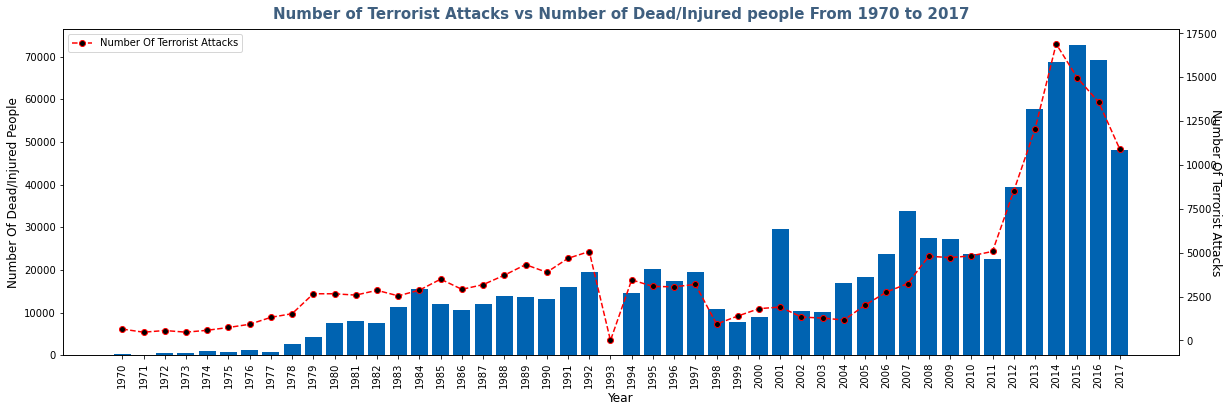

In [15]:
#Filter Data to choose Number Of Dead/Injured People In Terrorist Attacks From 1970 to 2017
people_damage = df[["Year","Damage"]].groupby('Year').sum()
list_year =  df["Year"].unique().tolist()

#draw bar chart
fig, ax1 = plt.subplots(figsize = (20,6))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values], color= '#0063B1' )

ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('Number Of Dead/Injured People', size = 12)
ax1.set_xlabel('Year', size = 12)
ax1.set_title('Number of Terrorist Attacks vs Number of Dead/Injured people From 1970 to 2017', fontsize= 15, pad= 10, weight ='bold', 
                    color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
ax2 = ax1.twinx()

# ----------------------------------------------------------------------------
#Filter & get a number of attacked in the world from 1970 to 2017 
number_attack = []
for year in list_year:
    number_attack.append(len(df[df['Year'] == year][["Year"]]))
number_attack.insert(23, 0)

#draw plot chart
ax2.set_ylabel('Number Of Terrorist Attacks', size = 12,rotation=-90)
ax2.plot(range(1970, 2018), number_attack, 'r--o', mfc='k', label='Number Of Terrorist Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()

<p style="font-size:16px;"> <b> INFERENCE: </b> </p>
This graph show the number of global terrorist attacks and number of dead/injured people by year from 1970 to 2017. Overall, the number of attacks have been increasing. 

* The number of dead/injured people also increase respectively. 
* The number of attacks increased significantly from 2012 to 2015. 
* The year 2015 is unlucky year with nearly 17000 reported terrorist attacks.

## Analysing the Terrorist attack types and Damage:

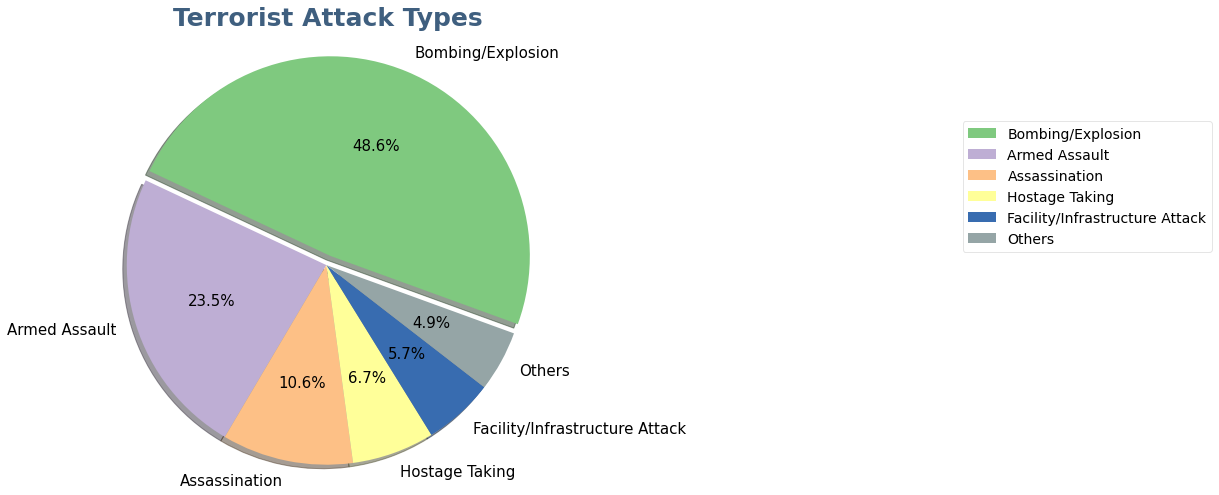

In [16]:
atk_filtered =df['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                            'Hostage Taking','Facility/Infrastructure Attack'] else 'Others')
attack_type = atk_filtered.value_counts().tolist()

# Pie chart of Terrorist attack types
labels = ['Bombing/Explosion','Armed Assault','Assassination',
          'Hostage Taking','Facility/Infrastructure Attack','Others']

sizes = []

for i in attack_type:
    percent = i*100/len(df['Attacktype'])
    sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,7))
patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0, 0),
        colors = sns.color_palette("Accent", 8)[:5]+[(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Terrorist Attack Types', fontsize= 25, pad= -70, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph
plt.tight_layout()
ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.8,0.5,0.1,1), prop={'size': 14})
fig.show()


In [17]:
# Creating table_1 about Attack types and number of Dead/Injured People

cat = ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']
color_cat = sns.color_palette("icefire", 8)[:5]
color_cat_dict = dict(zip(cat, color_cat))

table_1 = df[['Attacktype','Damage']].groupby('Attacktype',as_index = False).sum().sort_values(by='Damage', ascending=False)
table_1 = table_1.reset_index()

inci = [88255,42669,7276,19312,12149,659,1015,10356]
table_1["Incidents"] = np.array(inci)

table_1["Damage_rate"] = table_1["Damage"]/table_1["Incidents"]
table_1

,index,Attacktype,Damage,Incidents,Damage_rate
0,2,Bombing/Explosion,514233.0,88255,5.826673
1,0,Armed Assault,212386.0,42669,4.977525
2,7,Unknown,39606.0,7276,5.443375
3,1,Assassination,37209.0,19312,1.926729
4,5,Hostage Taking,27732.0,12149,2.282657
5,4,Hijacking,20642.0,659,31.323217
6,6,Unarmed Assault,14791.0,1015,14.572414
7,3,Facility/Infrastructure Attack,6293.0,10356,0.607667


In [18]:
table_1["Incidents"]

0    88255
1    42669
2     7276
3    19312
4    12149
5      659
6     1015
7    10356
Name: Incidents, dtype: int32

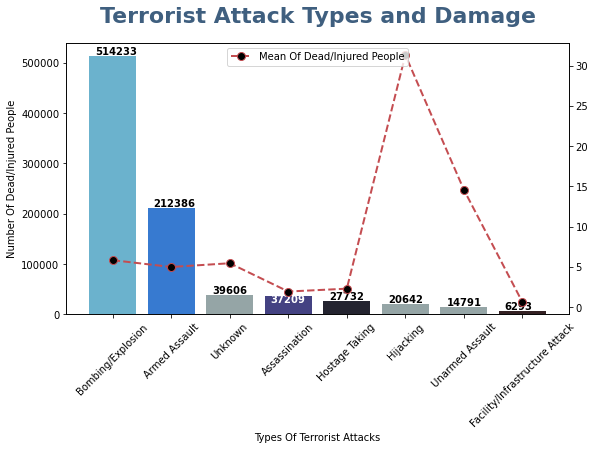

In [19]:
# Drawing chart of Terrorist Attack Types and the Damage
labels = table_1['Attacktype'].tolist()
x = np.arange(len(labels)) 
dmg = table_1['Damage'].tolist()

gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
color_list = [color_cat_dict[ter_type] if ter_type in color_cat_dict.keys() else gray for ter_type in labels]

d_rate = table_1["Damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(9,5))

#------------------------------------------------------------------------------------------------------------------

# Bar chart
ax1.bar(labels, dmg,
       color = color_list,
       align='center')

# Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')

#------------------------------------------------------------------------------------------------------------------

# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(labels, d_rate, linestyle='--', linewidth =2, marker ='o', 
         markerfacecolor='black', markersize = 8,
         label='Mean Of Dead/Injured People',
        color = '#C44D51')

plt.title('Terrorist Attack Types and Damage', fontsize= 22, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 

ax1.set(xlabel='Types Of Terrorist Attacks', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(labels, rotation=45)

plt.yticks(fontsize=10)

ax2.legend(loc='upper center') 
fig.show()

<p style = "font-size:16px"><b> INFERENCE: </b></p>
The total number of dead/injured people caused by Bombing/Explosion is the highest (514.233 people) since 48.6% of terrorist attacks belong to this type. However, Hijacking is actually the type of attacks which kills and injures the most number of people per attack (>30 people per attack). Facility/Infrastructure Attack type kills the least number of people both in total and per case.

## Analysing the Weapon types and the Damage caused:

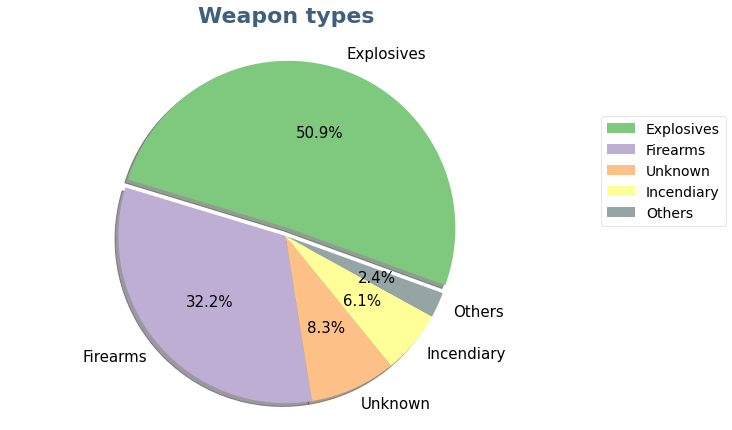

In [20]:
weaptype_filtered =df['Weaptype'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown',
                                                               'Incendiary'] else 'Others')
weaptype = weaptype_filtered.value_counts().tolist()

# Pie chart of weapons types
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']

weap_sizes = []

for j in weaptype:
    percent = j*100/len(data['Weaptype'])
    weap_sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,7))
patches, texts, autotexts = ax.pie(weap_sizes, labels=weap_labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0),
        colors = sns.color_palette("Accent", 8)[:4:1]+
                                   [(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Weapon types', fontsize= 22, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph

ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.2,0.5,0.1,1), prop={'size': 14})
fig.show()

In [21]:
# Creating table_2 about Weapon types and number of Dead/Injured People
table_2 = df[['Weaptype','Damage']].groupby('Weaptype',as_index = False).sum().sort_values(by='Damage', 
                                                                                             ascending=False)
df_count = df['Weaptype'].value_counts()
df_count = df_count.reindex(table_2['Weaptype'].values)
table_2['WeapCount'] = df_count.values
table_2["Weap_damage_rate"] = table_2["Damage"]/table_2["WeapCount"]
table_2

,Weaptype,Damage,WeapCount,Weap_damage_rate
2,Explosives,537788.0,92426,5.818579
4,Firearms,225473.0,58524,3.852659
10,Unknown,50167.0,15157,3.309824
11,Vehicle,20297.0,136,149.242647
6,Melee,14489.0,3655,3.964159
1,Chemical,14377.0,321,44.788162
5,Incendiary,8898.0,11135,0.799102
0,Biological,814.0,35,23.257143
9,Sabotage Equipment,357.0,141,2.531915
7,Other,225.0,114,1.973684


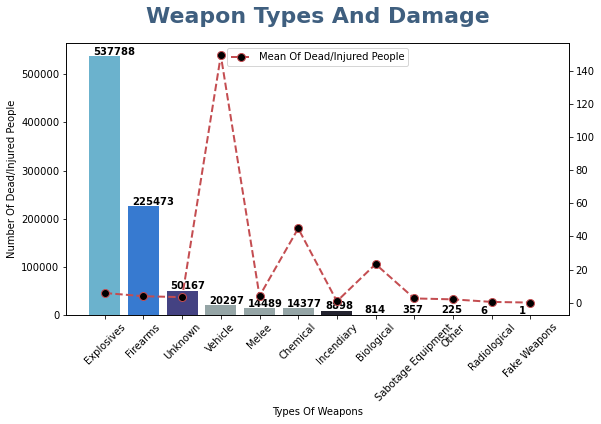

In [22]:
# Set same color with previous pie chart
weap_labels = table_2['Weaptype'].tolist()
y = np.arange(len(weap_labels)) 
weap_dmg = table_2['Damage'].tolist()

w_cat = ['Explosives','Firearms','Unknown','Incendiary']
w_color_cat = sns.color_palette("icefire", 8)[:4:1]
w_color_cat_dict = dict(zip(w_cat, w_color_cat))

w_gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
w_color_list = [w_color_cat_dict[ter_type] if ter_type in w_color_cat_dict.keys() 
                else w_gray for ter_type in weap_labels]

w_rate = table_2["Weap_damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(9,5))

# Bar chart
ax1.bar(weap_labels, weap_dmg,
       color = w_color_list,
       align='center')

# Number in bar chart
for i,v in enumerate(weap_dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')


# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(weap_labels, w_rate, linestyle='--', linewidth =2, marker ='o', 
         markerfacecolor='black', markersize =8,
         label='Mean Of Dead/Injured People',
        color = '#C44D51')

plt.title('Weapon Types And Damage', fontsize= 22, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 

ax1.set(xlabel='Types Of Weapons', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(weap_labels, rotation=45)

plt.yticks(fontsize=10)

ax2.legend(loc='upper center') 
fig.show()

<p style = "font-size:16px"><b> INFERENCE: </b></p>
Explosives and Firearms are the two most popular choice of terrorist attacks. However, the damage they cause per case are less than Vehicle, Chemical, and Biological weapons.

# Data analysis of Global Terrorism from 2000 to 2017

If we want to avoid Terrorist Attacks and look for the best place to live, we should focus on the situation of each country in the last 2 decades.

## Top 10 countries with the highest Number of Dead/Injured people in the world from 2000 to 2017

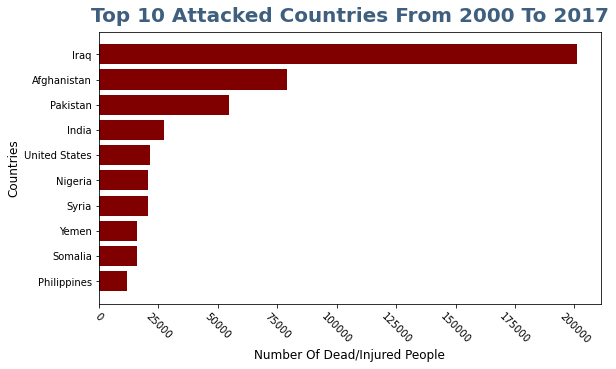

In [23]:
#Choosing comlumn Country and Damage from data
country_damage = df[df['Year'] > 1999][["Country", "Damage"]].groupby('Country',as_index=False).sum()
data_paint = country_damage.sort_values(by='Damage', ascending = False).head(10)

#Paint the bar chart
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = 'maroon')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries', size=12)
ax.set_xlabel('Number Of Dead/Injured People', size=12)
plt.title("Top 10 Attacked Countries From 2000 To 2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

## Top 10 targeted nationalities with the highest number of Dead/Injured People from 2000 to 2017

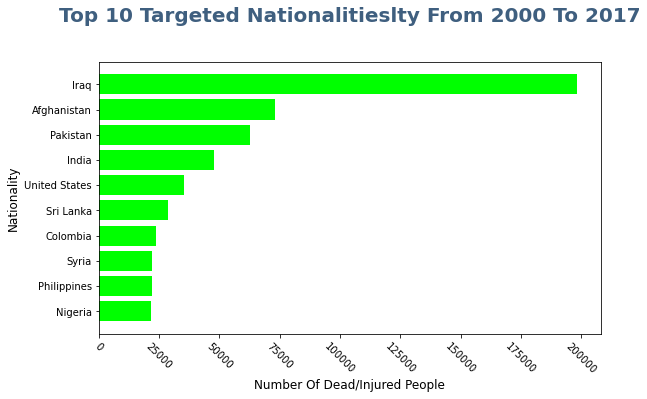

In [24]:
#Choosing comlumn Country and Damage from data
nalty_damage = df[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(9, 5))

#Paint bar chart
ax.barh(data_paint_natlty["Natlty1"][::-1], data_paint_natlty["Damage"][::-1], color = 'lime')
plt.xticks(rotation=-45)
ax.set_ylabel('Nationality', size=12)
ax.set_xlabel('Number Of Dead/Injured People', size=12)
plt.title("Top 10 Targeted Nationalitieslty From 2000 To 2017", fontsize= 20, pad= 40, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

plt.show()

<p style="font-size:16px;"><b>INFERENCE: </b> </p>

Before taking a look at the top 10 safest countries, we should take a look at top 10 most targerted countries and nationalities. Top 4 most targeted countries and nationalities are still Iraq, Pakistan, Afganistan and India. The situation have not been improved in the last 2 decadeds for these countries.

## Identify the safest countries from 2000 to 2017 which has 0 dead/injured people caused by Terrorist Attacks

In [25]:
#Filtering from dataframe country_damage
country_damage[country_damage["Damage"]==0]

,Country,Damage
9,Bahamas,0.0
14,Belize,0.0
34,Cyprus,0.0
64,Iceland,0.0
105,New Zealand,0.0
117,Portugal,0.0
129,Slovenia,0.0
139,Swaziland,0.0
147,Togo,0.0
160,Vietnam,0.0


<p style = "font-size:16px"><b> INFERENCE: </b></p>
These are the TOP 10 countries that are safe.

## Functions show both Top 10 Attacked Countries and Top 10 Targeted Nationalities charts

In [26]:
def country_nationality(n):
  
    """
    Function to draw the bar charts 
    of Top 10 Attacked Countries and Top 10 Targeted Nationalities 
    """

    #Filter data and choose Top 10 Attacked Countries
    top10_bad = df[df['Year'] == n][["Country", "Damage"]].groupby('Country',as_index=False).sum()
    data_paint = top10_bad.sort_values(by='Damage', ascending = False).head(10)

    #Paint bar chart
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    ax[0].barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = ['red', 'blue', 'green', '#34465D', '#df2029', '#FFFC00', '#E4405F', '#3B5999', '#00c300', '#ff0084'])
    ax[0].set_ylabel('Countries', size=16)
    ax[0].set_xlabel('Number Of Dead/Injured People', size=16)
    ax[0].set_title("Top 10 Attacked Countries %d" % n, fontsize= 15, pad= 10, weight ='bold', 
                  color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
    plt.subplots_adjust(wspace=0.3)
    #Filter data and choose Top 10 Targeted Nationalities    
    nalty_damage = df[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
    data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(10)

    #Paint bar chart
    ax[1].barh(data_paint_natlty["Natlty1"][::-1], data_paint["Damage"][::-1], color = ['red', 'blue', 'green', '#34465D', '#df2029', '#131418', '#AF0606', '#0084ff', '#ff6600', '#410093'])
    ax[1].set_xlabel('Number Of Dead/Injured People',size=16)
    ax[1].set_ylabel('Nationalities', size=16)
    ax[1].set_title("Top 10 Targeted Nationalities %d" % n, fontsize= 15, pad= 10, weight ='bold', 
                  color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
    for ax in fig.axes:
        plt.sca(ax)
    plt.show()

## Time-series Top 10 Attacked Countries and Top 10 Targeted Nationalities

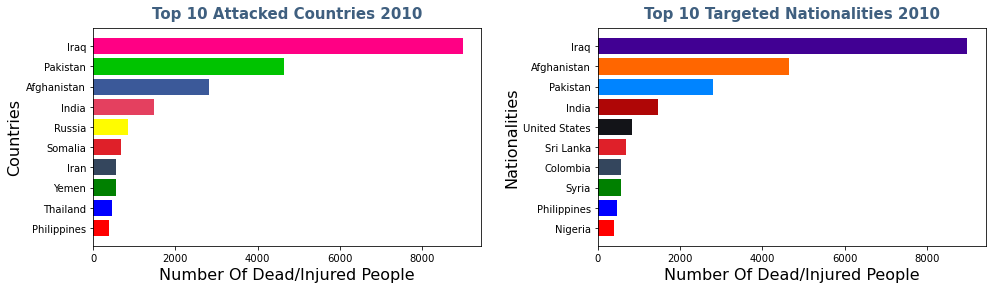

In [27]:
country_nationality(2010)

## Draw chart of Top 10 Attacked Countries and Top 10 Targeted Nationalities with the specific year input

Input the Year you want to see chart! (1970 -2017): 2001


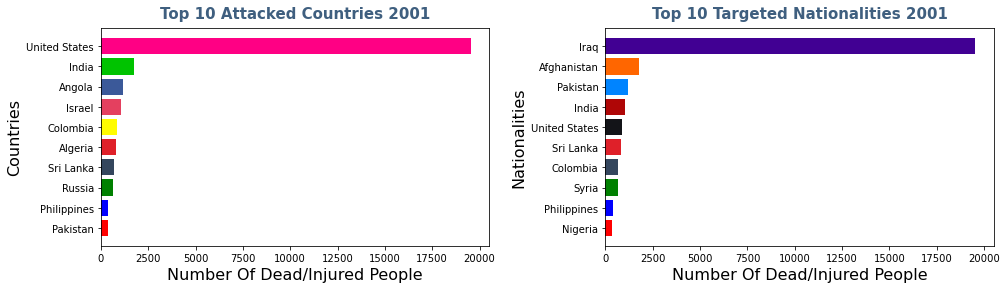

In [28]:
def country_nationality_year():
    """
    Function to paint chart with specific input year
    """

  # Input year. Try if it in list_year
    try:
        year = int(input ('Input the Year you want to see chart! (1970 -2017): '))
        if year == 1993:
            print('Sorry, No Terrorism Data in 1993')
            year = int(input ('Input the Year you want to see chart! (1970 -2017): '))
        while year not in list_year:
            print("Please Input the year from 1970 to 2017")
            year = int(input('Input the Year you want to see chart! (1970 -2017): '))

  #When have error, print error and call function timseri_year
    except (ValueError, ZeroDivisionError) as ex:  # Called when have error typing
        print("Wrong type, input again: ")
        country_nationality_year()

  #when don't have error: 
    else:
       #print chart with function timeseri(year)
        country_nationality(year)
country_nationality_year()

In [29]:
data.to_csv("CleanData.csv",index=False)

<p style = "font-size:18px"><center><b> THANK YOU </b></center></p>